In [1]:
import scipy.io.wavfile as wav
import scipy.signal as ss
import numpy as np
import os
import matplotlib.pyplot as plt

## Checking file info ie. sample rate, data.shape, duration

In [2]:
sample_rate, data = wav.read('trimmed_files/1_A-flute.wav')
sample_rate, data #checking data files

(44100,
 array([[ 0.0000000e+00,  0.0000000e+00],
        [-2.5904336e-07, -2.5904336e-07],
        [-9.7212592e-07, -9.7212592e-07],
        ...,
        [-1.1488070e-03, -2.0297655e-04],
        [-8.5483294e-04, -2.9530114e-04],
        [-5.7738624e-04, -4.1617479e-04]], shape=(44100, 2), dtype=float32))

In [3]:
duration_seconds = len(data) / 44100
duration_seconds

1.0

## Checking file info for entire folder

In [2]:
trimmed_path = 'trimmed_files'

x=0 

for files in os.listdir(trimmed_path):
    file_path = os.path.join(trimmed_path, files)
    sample_rate, data = wav.read(file_path)
    if sample_rate == 44100:
        if data.shape == (44100, 2):
            x+=1 #there probably is a better way to just return true/false values
        else: 
            print('error')
    else:
        print('error')

x

60

## LOOP TO TRIM 
__DO NOT RUN AGAIN__

In [5]:
folder_path = 'sound_data'
os.makedirs('./trimmed_files')

for old_files in os.listdir(folder_path):
    if old_files.endswith('.wav'):
        file_path = os.path.join(folder_path, old_files)
        sample_rate, data = wav.read(file_path)
        trimmed_data = data[:44100]  # slice the data array to the first 1 second
        trimmed_filename = f"1_{old_files}"
        trimmed_file_path = os.path.join('./trimmed_files', trimmed_filename)
        wav.write(trimmed_file_path, sample_rate, trimmed_data)

        print(f"Trimmed {old_files} and saved as {trimmed_filename}")

Trimmed A#-Flute.wav and saved as 1_A#-Flute.wav
Trimmed A#-Oboe.wav and saved as 1_A#-Oboe.wav
Trimmed A#-Violin.wav and saved as 1_A#-Violin.wav
Trimmed A#-Violoncello.wav and saved as 1_A#-Violoncello.wav
Trimmed A#.wav and saved as 1_A#.wav
Trimmed A-Flute.wav and saved as 1_A-Flute.wav
Trimmed A-Oboe.wav and saved as 1_A-Oboe.wav
Trimmed A-Violin.wav and saved as 1_A-Violin.wav
Trimmed A-Violoncello.wav and saved as 1_A-Violoncello.wav
Trimmed A.wav and saved as 1_A.wav
Trimmed B-Flute.wav and saved as 1_B-Flute.wav
Trimmed B-Oboe.wav and saved as 1_B-Oboe.wav
Trimmed B-Violin.wav and saved as 1_B-Violin.wav
Trimmed B-Violoncello.wav and saved as 1_B-Violoncello.wav
Trimmed B.wav and saved as 1_B.wav
Trimmed C#-Flute.wav and saved as 1_C#-Flute.wav
Trimmed C#-Oboe.wav and saved as 1_C#-Oboe.wav
Trimmed C#-Violin.wav and saved as 1_C#-Violin.wav
Trimmed C#-Violoncello.wav and saved as 1_C#-Violoncello.wav
Trimmed C#.wav and saved as 1_C#.wav
Trimmed C-Flute.wav and saved as 1_C-Flu

## Plotting FFT signature and peaks

[ 277  555  559  831 1111 1116 1387 1664]
[ 83.2943   113.90605   28.886229  23.535421 147.9686    60.87818
 187.96724   25.75908 ]


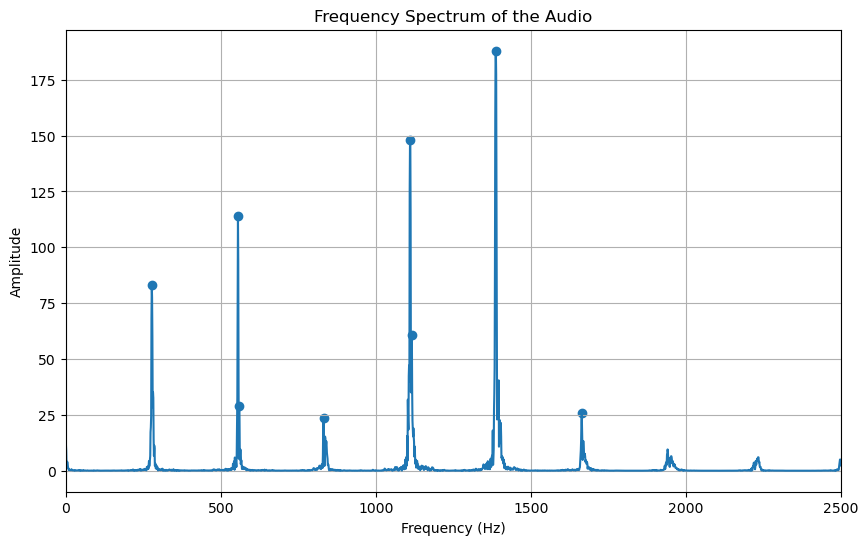

In [39]:
sample_rate, data = wav.read('trimmed_files/1_C#-Oboe.wav')
data = data[:, 0]  # isolate channel 1

# Y-values AMPLITUDE 
fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
amplitude = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)


# X-values CORRESPONDING FREQUENCIES
n = len(data)
frequencies = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate

# FINDING PEAKS 
        # QN: DOES THIS REALLY HELP TO DETERMINE IF X-AXIS = Hz?
peak_indices, _ = ss.find_peaks(amplitude[:n//2], prominence=20) # find peaks in positive range 

    # CHECKING
print(peak_indices)
print(amplitude[peak_indices])
    # print(list(zip(peak_indices,amplitude[peak_indices])))

plt.figure(figsize=(10, 6))

plt.scatter(frequencies[peak_indices],amplitude[peak_indices]) # plot peaks 
    # CHECKING
    # plt.xlim(250,1800)


# PLOT BEAUTIFIERS
plt.title('Frequency Spectrum of the Audio')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
    # CHECKING    
    # plt.ylim(0,10)
plt.grid(True)

# PLOTTING
plt.plot(frequencies[:n//2], amplitude[:n//2]) # slice to obtain last 22050 elements in the array ie. positive X-values FREQUENCIES
        # CHECKING
        # plt.xlim(438,442)
        # print(frequencies[peak_indices])

plt.xlim(0,2500)

plt.show()

### ^this shows that oboe C# argmax is 4x pri freq

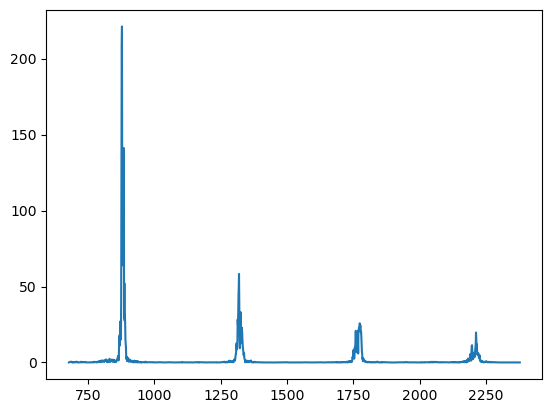

In [6]:
# THRESHOLDING 
        # let's take delta(-) = 200, delta(+) = 1500

#JUSTIFY DECISION: smallest = 261, largest = 493; 500 x 3 = 1,500

central_index = np.argmax(amplitude)

spliced_f=frequencies[(central_index-200):(central_index+1500)]
spliced_a=amplitude[(central_index-200):(central_index+1500)]

plt.plot(spliced_f, spliced_a)

## Now we loop

### Check for anomalies

#### make into a loop if possible
- use .isnear() to automate
- iterate throguh all instruments

In [3]:
trimmed_path = 'trimmed_files'

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Oboe.wav'):
        file_path = os.path.join(trimmed_path, allfiles)
        sample_rate, data = wav.read(file_path)
        data = data[:, 0]  # isolate channel 1
        
        fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
        amplitude = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)
               
        central_index = np.argmax(amplitude)
        norm = amplitude[central_index]
        print(allfiles, central_index, norm)

1_A#-Oboe.wav 1395 216.11316
1_A-Oboe.wav 1316 222.3401
1_B-Oboe.wav 1478 290.20306
1_C#-Oboe.wav 1387 187.96724
1_C-Oboe.wav 1308 168.01947
1_D#-Oboe.wav 1556 205.16008
1_D-Oboe.wav 1468 214.8357
1_E-Oboe.wav 1319 256.4481
1_F#-Oboe.wav 1481 163.02309
1_F-Oboe.wav 1397 209.08115
1_G#-Oboe.wav 1663 178.31755
1_G-Oboe.wav 1570 190.31557


### ANOMALIES: determine pri freq
- help to tidy the code, with a loop
- iterate through all the instruments

In [4]:
ref_pitch = {'1_A#':466.16,
'1_A':440,
'1_B':493.88,
'1_C#':277.18, 
'1_C':261.63,
'1_D#':311.13, 
'1_D':293.66,
'1_E':329.63, 
'1_F#':369.99, 
'1_F':349.23, 
'1_G#':415.30, 
'1_G':392.00
}
for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Oboe.wav'):
        file_path = os.path.join(trimmed_path, allfiles)
        sample_rate, data = wav.read(file_path)
        data = data[:, 0]
        fft_data = np.fft.fft(data) 
        amplitude = np.abs(fft_data)
               
        central_index = np.argmax(amplitude)
        norm = amplitude[central_index]

        letter_name = allfiles.split('-')[0]
        if np.isclose(ref_pitch[letter_name],central_index,atol=5) == False:
            if np.isclose(ref_pitch[letter_name],central_index/2,atol=5) == False:
                if np.isclose(ref_pitch[letter_name],central_index/3,atol=5) == False:
                    if np.isclose(ref_pitch[letter_name],central_index/4,atol=5) == False:
                        if np.isclose(ref_pitch[letter_name],central_index/5,atol=5) == False:
                            if np.isclose(ref_pitch[letter_name],central_index/6,atol=5) == False:
                                print('help')
                        else: print(round(central_index/5), 5)
                    else: print(round(central_index/4), 4)
                else: print(round(central_index/3), 3)
            else: print(round(central_index/2), 2)
        else: print(central_index, 1)

465 3
439 3
493 3
277 5
262 5
311 5
294 5
330 4
370 4
349 4
416 4
392 4


### ^this shows that different notes have argmax at different places eg. 3x / 4x / 4x the pri frequency 

In [38]:
ref_pitch = {'1_A#':466.16,
'1_A':440,
'1_B':493.88,
'1_C#':277.18, 
'1_C':261.63,
'1_D#':311.13, 
'1_D':293.66,
'1_E':329.63, 
'1_F#':369.99, 
'1_F':349.23, 
'1_G#':415.30, 
'1_G':392.00
}

# ref_pitch['1_F']

oboe_central = {}

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Oboe.wav'):
        file_path = os.path.join(trimmed_path, allfiles)
        sample_rate, data = wav.read(file_path)
        data = data[:, 0]
        fft_data = np.fft.fft(data) 
        amplitude = np.abs(fft_data)
               
        central_index = np.argmax(amplitude)
        norm = amplitude[central_index]

        letter_name = allfiles.split('-')[0]
        if np.isclose(ref_pitch[letter_name],central_index,atol=5) == False:
            if np.isclose(ref_pitch[letter_name],central_index/2,atol=5) == False:
                if np.isclose(ref_pitch[letter_name],central_index/3,atol=5) == False:
                    if np.isclose(ref_pitch[letter_name],central_index/4,atol=5) == False:
                        if np.isclose(ref_pitch[letter_name],central_index/5,atol=5) == False:
                            if np.isclose(ref_pitch[letter_name],central_index/6,atol=5) == False:
                                print('help')
                        else: oboe_central[allfiles]=(round(central_index/5))
                    else: oboe_central[allfiles]=(round(central_index/4))
                else: oboe_central[allfiles]=(round(central_index/3))
            else: oboe_central[allfiles]=(round(central_index/2))
        else: oboe_central[allfiles]=(central_index)

oboe_central

{'1_A#-Oboe.wav': 465,
 '1_A-Oboe.wav': 439,
 '1_B-Oboe.wav': 493,
 '1_C#-Oboe.wav': 1277,
 '1_C-Oboe.wav': 1262,
 '1_D#-Oboe.wav': 1311,
 '1_D-Oboe.wav': 1294,
 '1_E-Oboe.wav': 330,
 '1_F#-Oboe.wav': 370,
 '1_F-Oboe.wav': 349,
 '1_G#-Oboe.wav': 416,
 '1_G-Oboe.wav': 392}

### ^this code can convert the argmax into primary frequency, however, these values do not reflect exactly where the peak actually is, as shown below, the 12 tones will be slightly off alignment from each other, meaning that the true peaks are not exactly 3x / 4x / 5x the primary frequencies, but maybe eg. 3.1x / 4.9x etc. hence, we cannot simply divide by 3 / 4/ 5 etc.

### Normalised after correcting anomalies

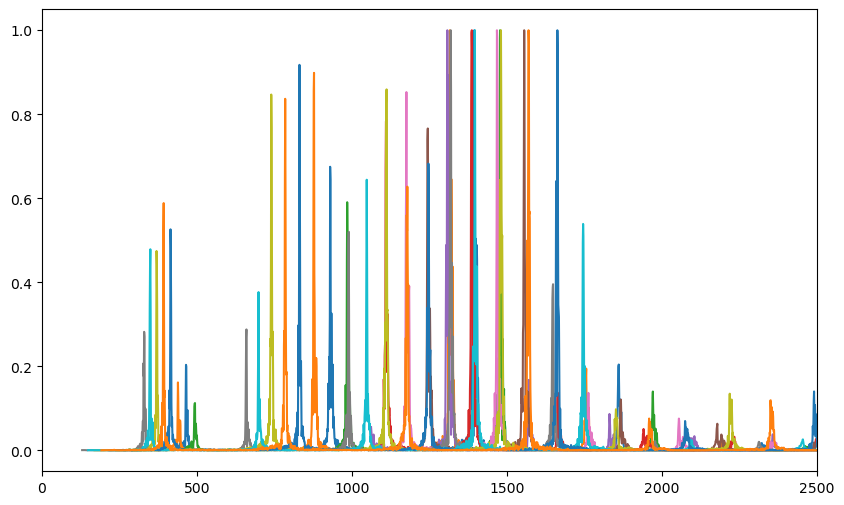

In [45]:
plt.figure(figsize=(10, 6))
    # plt.ylim(0,10)

trimmed_path = 'trimmed_files'

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Oboe.wav'):
        file_path = os.path.join(trimmed_path, allfiles)
        sample_rate, data = wav.read(file_path)
        data = data[:, 0]  # isolate channel 1
        
        fft_data = np.fft.fft(data) 
        amplitude = np.abs(fft_data)
    
        n = len(data)
        frequencies = np.fft.fftfreq(n, 1 / sample_rate)
        
        central_index = oboe_central[allfiles]
        norm = amplitude[np.argmax(amplitude)]
                
        spliced_f=frequencies[(central_index-200):(central_index+2500)]
        spliced_a=amplitude[(central_index-200):(central_index+2500)]
        norm_a = spliced_a/norm
               
        plt.plot(spliced_f, norm_a) 
        # plt.xlim(438,442)
        # print(frequencies[peak_indices])

plt.xlim(0,2500)

plt.show()

### ^peaks off alignment from each other

### ANOMALIES: second highest peak
- find peaks
- order descending
- slice array [2]
\
\
need to set condition to only find second highest peak only when find_peaks return not .isclose()

[  465   930   934   938  1390  1395  1400  1403  1407  1861 42239 42693
 42697 42700 42705 42710 43162 43166 43170 43635]
[  439   878   882   885  1312  1316  1321  1325  1756 42344 42775 42779
 42784 42788 43215 43218 43222 43661]
[  494   980   985   990  1473  1478  1483  1487  1971 42129 42613 42617
 42622 42627 43110 43115 43120 43606]
[  277   555   559   831  1111  1116  1387  1664 42436 42713 42984 42989
 43269 43541 43545 43823]
[  261   525  1048  1305  1308  1310  1314  1322  1571 42529 42778 42786
 42790 42792 42795 43052 43575 43839]
[  311   623   933  1245  1252  1255  1556  1562  1868 42232 42538 42544
 42845 42848 42855 43167 43477 43789]
[  294   588  1176  1181  1185  1468  1475  1763 42337 42625 42632 42915
 42919 42924 43512 43806]
[  330   660   990   993  1319  1323  1325  1643  1649  1654 42446 42451
 42457 42775 42777 42781 43107 43110 43440 43770]
[  370   740  1112  1478  1481  2219 41881 42619 42622 42988 43360 43730]
[  350   699  1048  1397  1400  1402  

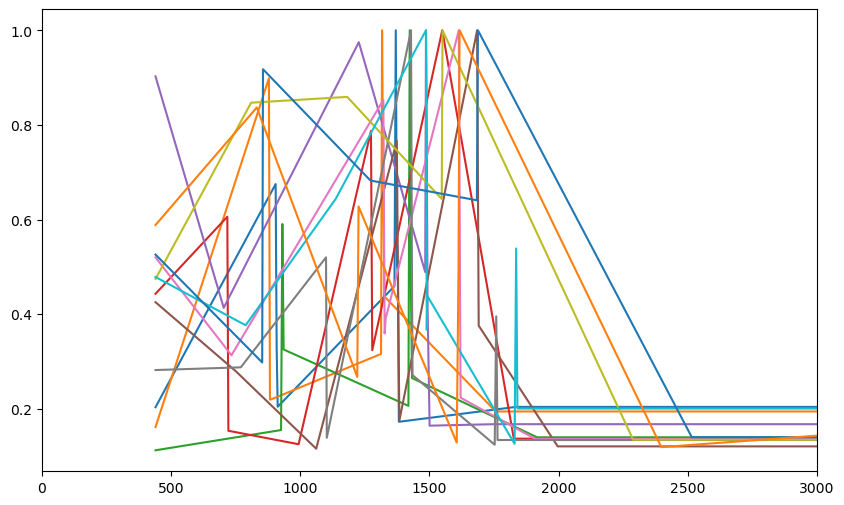

In [72]:
plt.figure(figsize=(10, 6))
    # plt.ylim(0,10)
for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Oboe.wav'):
        file_path = os.path.join(trimmed_path, allfiles)
        sample_rate, data = wav.read(file_path)
        data = data[:, 0]  # isolate channel 1
        
        fft_data = np.fft.fft(data) 
        amplitude = np.abs(fft_data)
    
        n = len(data)
        frequencies = np.fft.fftfreq(n, 1 / sample_rate)
        
        norm = amplitude[np.argmax(amplitude)]
                
        # spliced_f=frequencies[(central_index-200):(central_index+2500)]
        # spliced_a=amplitude[(central_index-200):(central_index+2500)]
        # norm_a = spliced_a/norm
        
        peaks_set, _ = ss.find_peaks(amplitude, prominence=20) # freq of all peaks 
        central_index = peaks_set[0] # pri freq
        peaks_a = amplitude[peaks_set]
        norm_f = np.array(peaks_set)-(central_index-440) # to 440

        
        # spliced_f = frequencies[(central_index-200):(central_index+2500)]
        # if isclose dict
     
        print(peaks_set)
        plt.plot(norm_f, peaks_a/norm) 
        # plt.xlim(438,442)
        # print(frequencies[peak_indices])

plt.xlim(0,3000)

plt.show()

### ^by using ss.find_peaks, i tried to find 2nd highest peak, but again, that does not give the primary frequency either, it can be seen in the arrays below where i printed all the peaks.

### however, the first value of the 12 arrays are indeed the primary frequencies. in the plot above, i aligned all the primary frequencies (normalised). but the rest of the peaks did not align, possibly as the arrays were of different lengths

[  465   930   934   938  1390  1395  1400  1403  1407  1861 42239 42693
 42697 42700 42705 42710 43162 43166 43170 43635]
[  439   878   882   885  1312  1316  1321  1325  1756 42344 42775 42779
 42784 42788 43215 43218 43222 43661]
[  494   980   985   990  1473  1478  1483  1487  1971 42129 42613 42617
 42622 42627 43110 43115 43120 43606]
[  277   555   559   831  1111  1116  1387  1664 42436 42713 42984 42989
 43269 43541 43545 43823]
[  261   525  1048  1305  1308  1310  1314  1322  1571 42529 42778 42786
 42790 42792 42795 43052 43575 43839]
[  311   623   933  1245  1252  1255  1556  1562  1868 42232 42538 42544
 42845 42848 42855 43167 43477 43789]
[  294   588  1176  1181  1185  1468  1475  1763 42337 42625 42632 42915
 42919 42924 43512 43806]
[  330   660   990   993  1319  1323  1325  1643  1649  1654 42446 42451
 42457 42775 42777 42781 43107 43110 43440 43770]
[  370   740  1112  1478  1481  2219 41881 42619 42622 42988 43360 43730]
[  350   699  1048  1397  1400  1402  

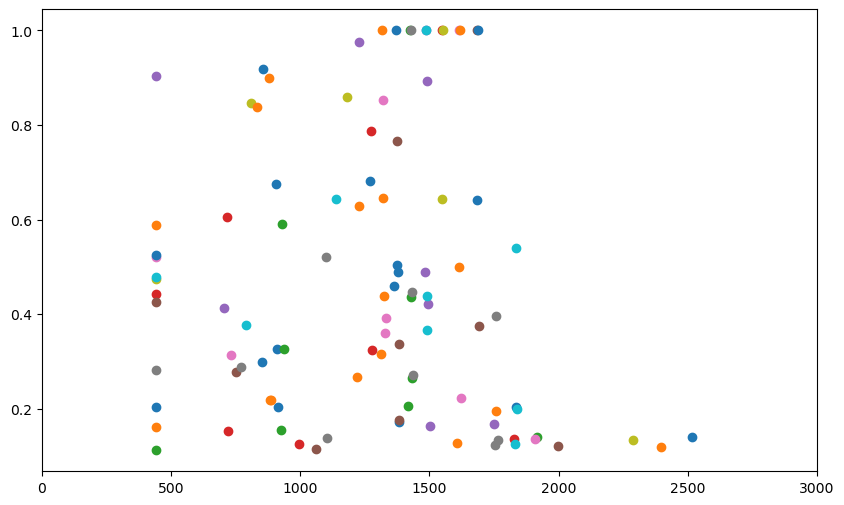

In [7]:
plt.figure(figsize=(10, 6))
    # plt.ylim(0,10)

oboe_f=[]
oboe_a=[]

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Oboe.wav'):
        file_path = os.path.join(trimmed_path, allfiles)
        sample_rate, data = wav.read(file_path)
        data = data[:, 0]  # isolate channel 1
        
        fft_data = np.fft.fft(data) 
        amplitude = np.abs(fft_data)
    
        n = len(data)
        frequencies = np.fft.fftfreq(n, 1 / sample_rate)
        
        norm = amplitude[np.argmax(amplitude)]
                
        # spliced_f=frequencies[(central_index-200):(central_index+2500)]
        # spliced_a=amplitude[(central_index-200):(central_index+2500)]
        # norm_a = spliced_a/norm
        
        peaks_set, _ = ss.find_peaks(amplitude, prominence=20) # freq of all peaks 
        central_index = peaks_set[0] # pri freq
        peaks_a = amplitude[peaks_set]
        norm_f = np.array(peaks_set)-(central_index-440) # to 440

        
        # spliced_f = frequencies[(central_index-200):(central_index+2500)]
        # if isclose dict
     
        print(peaks_set)
        oboe_a.append(peaks_a/norm)
        oboe_f.append(norm_f)
        plt.scatter(norm_f, peaks_a/norm)
        # plt.xlim(438,442)
        # print(frequencies[peak_indices])

plt.xlim(0,3000)

plt.show()
            
# means_cello = np.mean(arrays_cello, axis=0)

### ^this shows that while i have already aligned the primary frequencies, that does not automatically align the other peaks, showing that peaks are not equidistant apart for differnt pitches. hence, we might need to find out about interpollation if we want to really align them. 

### so 1. peaks are not exactly 3x / 4x/ 5x apart
### 2. peaks are not separated by X Hz, where X is the same for every pitch

### DATA CLEANING

In [ ]:
trimmed_path = 'trimmed_files'

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Oboe.wav'):
        file_path = os.path.join(trimmed_path, allfiles)
        sample_rate, data = wav.read(file_path)
        data = data[:, 0]  # isolate channel 1
        
        # Y-values AMPLITUDE 
        fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
        amplitude = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)
        
        central_index = np.argmax(amplitude)
        norm = amplitude[central_index]
        norm_a = amplitude/norm
        
        peaky_index,_ = ss.find_peaks(norm_a[:1700], prominence=0.05)
        
        # X-values CORRESPONDING FREQUENCIES
        n = len(data)
        frequencies = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate

            
        print(allfiles, peaky_index, central_index)

### Finding peaks, ignore the rest of the data 

In [4]:
trimmed_path = 'trimmed_files'

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Flute.wav'):
        file_path = os.path.join(trimmed_path, allfiles)
        sample_rate, data = wav.read(file_path)
        data = data[:, 0]  # isolate channel 1
        
        # Y-values AMPLITUDE 
        fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
        amplitude = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)
        
        central_index = np.argmax(amplitude)
        norm = amplitude[central_index]
        norm_a = amplitude/norm
        
        peaky_index,_ = ss.find_peaks(norm_a[:1700], prominence=0.05)
        
        # X-values CORRESPONDING FREQUENCIES
        n = len(data)
        frequencies = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate

            
        print(allfiles, peaky_index, central_index)

1_A#-Flute.wav [ 465  469  930 1396 1401] 465
1_A-Flute.wav [ 436  439  443  877  880 1317] 439
1_B-Flute.wav [ 492  496  985 1479] 492
1_C#-Flute.wav [ 274  279  551  556  558  562  834 1114 1120 1387 1395 1401 1672] 556
1_C-Flute.wav [ 262  265  527  787 1052 1057 1316 1579] 262
1_D#-Flute.wav [ 308  312  619  625  628  929  933  937  943 1239 1243 1245 1250 1253
 1557 1560] 1253
1_D-Flute.wav [ 295  592  878  884  886 1176 1180 1469 1477 1484] 295
1_E-Flute.wav [ 326  331  661  989  993  999 1313 1319 1323 1327 1650 1655] 331
1_F#-Flute.wav [ 366  370  374  736  740 1112 1481] 370
1_F-Flute.wav [ 350  354  696  700  705 1048 1052 1056 1398 1404] 1404
1_G#-Flute.wav [ 415  831 1248 1659 1664 1668] 415
1_G-Flute.wav [ 393  781  785  790 1179 1566 1571] 393


### Plot all Cello

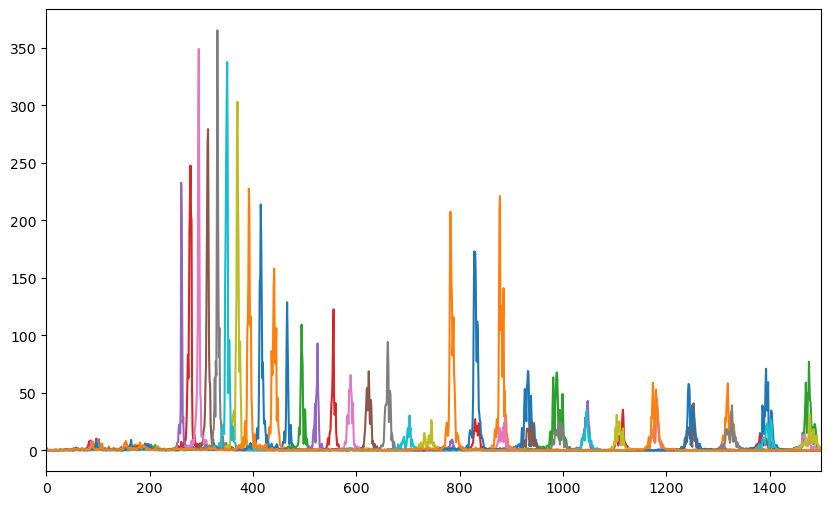

In [8]:
plt.figure(figsize=(10, 6))
    # plt.ylim(0,10)

trimmed_path = 'trimmed_files'

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Violoncello.wav'):
        file_path = os.path.join(trimmed_path, allfiles)
        sample_rate, data = wav.read(file_path)
        data = data[:, 0]  # isolate channel 1
    
        # Y-values AMPLITUDE 
        fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
        amplitude = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)

        # X-values CORRESPONDING FREQUENCIES
        n = len(data)
        frequencies = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate

        # PLOTTING
        plt.plot(frequencies[:n//2], amplitude[:n//2]) # slice to obtain last 22050 elements in the array ie. positive X-values FREQUENCIES
            # CHECKING
            # plt.xlim(438,442)
            # print(frequencies[peak_indices])

plt.xlim(0,1500)

plt.show()

## Normalising 12 cello waves

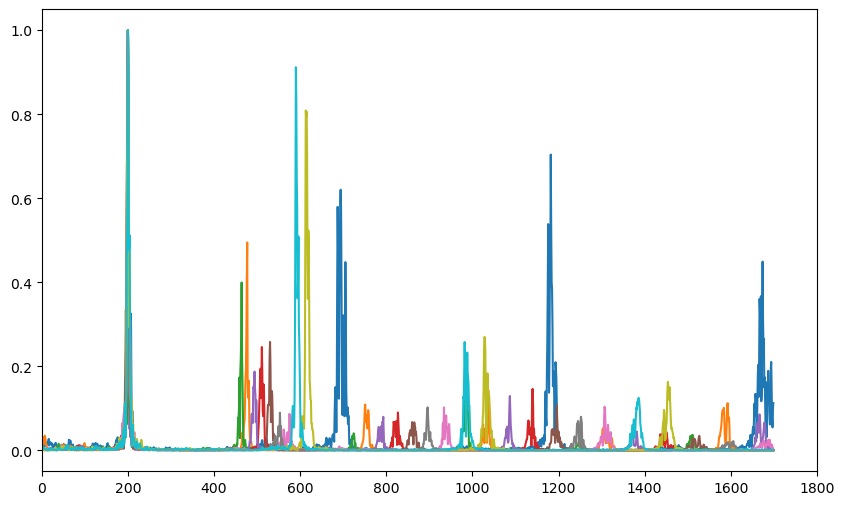

In [193]:
plt.figure(figsize=(10, 6))
    # plt.ylim(0,10)

trimmed_path = 'trimmed_files'

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Violoncello.wav'):
        if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]  # isolate channel 1
        
            # Y-values AMPLITUDE 
            fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
            amplitude = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)
    
            # X-values CORRESPONDING FREQUENCIES
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate
    
            # NORMALISE X-AXIS, taking delta(-) = 200, delta(+) = 1500
                
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                    # print(central_index) CHECKING
                
            spliced_f=frequencies[(central_index-200):(central_index+1500)]
            spliced_a=amplitude[(central_index-200):(central_index+1500)]
            norm_a = spliced_a/norm
               
            # PLOTTING
            plt.plot(norm_a) 
            
                # plt.xlim(438,442)
                # print(frequencies[peak_indices])

plt.xlim(0,1800)

plt.show()

## Comparing 4 instruments

[ 200  590  613 1182]
[ 195  200  543  549  892  977 1243 1370]
[ 200  465  497  530  638  693 1192 1311 1378 1449]
[200]


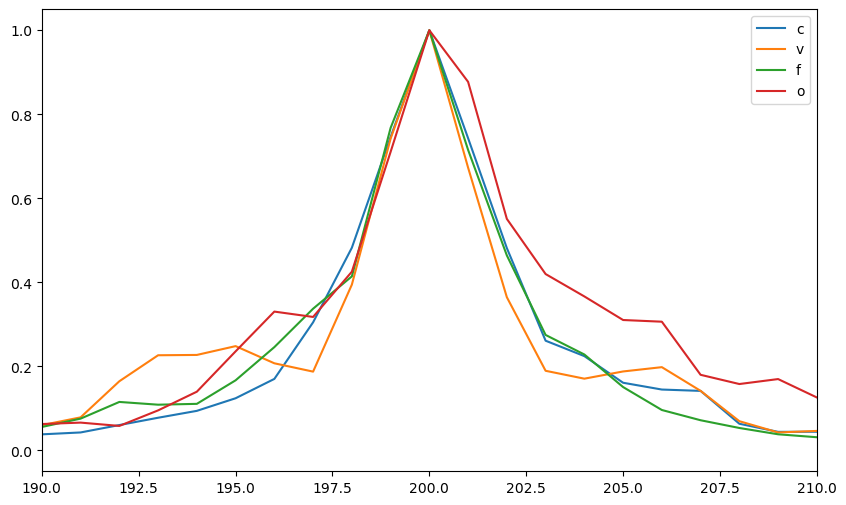

In [8]:
plt.figure(figsize=(10, 6))
    # plt.ylim(0,10)

arrays_cello=[]
arrays_violin=[]
arrays_flute=[]
arrays_oboe=[]

trimmed_path = 'trimmed_files'

for allfiles in os.listdir(trimmed_path):
    if allfiles.endswith('Violoncello.wav'):
        #if not allfiles.startswith('1_A'): # there might be something wrong with A? HELPP
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]  # isolate channel 1
        
            # Y-values AMPLITUDE 
            fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
            amplitude = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)
    
            # X-values CORRESPONDING FREQUENCIES
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate
            
            # NORMALISE X-AXIS, taking delta(-) = 200, delta(+) = 1500
            
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                # print(central_index) CHECKING
            
            spliced_f=frequencies[(central_index-200):(central_index+1500)]
            spliced_a=amplitude[(central_index-200):(central_index+1500)]
            norm_a = spliced_a/norm
            
            arrays_cello.append(norm_a)
            
            # plt.plot(spliced_a) NOT PLOTTING FIRST

    if allfiles.endswith('Violin.wav'):
        #if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]
        
            fft_data = np.fft.fft(data) 
            amplitude = np.abs(fft_data)
    
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)  
                
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                # print(central_index) CHECKING
            
            spliced_f=frequencies[(central_index-200):(central_index+1500)]
            spliced_a=amplitude[(central_index-200):(central_index+1500)]
            norm_a = spliced_a/norm
            
            arrays_violin.append(norm_a)

    if allfiles.endswith('Flute.wav'):
        #if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]
        
            fft_data = np.fft.fft(data) 
            amplitude = np.abs(fft_data)
    
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)  
                
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                # print(central_index) CHECKING
            
            spliced_f=frequencies[(central_index-200):(central_index+1500)]
            spliced_a=amplitude[(central_index-200):(central_index+1500)]
            norm_a = spliced_a/norm
            
            arrays_flute.append(norm_a)
            
    if allfiles.endswith('Oboe.wav'):
        #if not allfiles.startswith('1_A'):
            file_path = os.path.join(trimmed_path, allfiles)
            sample_rate, data = wav.read(file_path)
            data = data[:, 0]
        
            fft_data = np.fft.fft(data) 
            amplitude = np.abs(fft_data)
    
            n = len(data)
            frequencies = np.fft.fftfreq(n, 1 / sample_rate)  
                
            central_index = np.argmax(amplitude)
            norm = amplitude[central_index]
                # print(central_index) CHECKING
            
            spliced_f=frequencies[(central_index-200):(central_index+1500)]
            spliced_a=amplitude[(central_index-200):(central_index+1500)]
            norm_a = spliced_a/norm
            
            arrays_oboe.append(norm_a)
            
means_cello = np.mean(arrays_cello, axis=0)
means_violin = np.mean(arrays_violin, axis=0)
means_flute = np.mean(arrays_flute, axis=0)
means_oboe = np.mean(arrays_oboe, axis=0)

# KIV np.argmax(means_cello)


# NUMERICAL DATA
peaks_cello,_ = ss.find_peaks(means_cello, prominence=0.05)
peaks_violin,_ = ss.find_peaks(means_violin, prominence=0.05)
peaks_flute,_ = ss.find_peaks(means_flute, prominence=0.05)
peaks_oboe,_ = ss.find_peaks(means_oboe, prominence=0.05)

print(peaks_cello)
print(peaks_violin)
print(peaks_flute)
print(peaks_oboe)

# GRAPHICAL DATA
plt.plot(means_cello)
plt.plot(means_violin)
plt.plot(means_flute)
plt.plot(means_oboe)

plt.legend('cvfo')

plt.xlim(190,210)
#plt.ylim(0,0.2)
plt.show()

In [12]:
print(frequencies[:10])
len(frequencies)
print(frequencies[10:])
frequencies>=0
np.all(frequencies[:n//2] > 0)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[10. 11. 12. ... -3. -2. -1.]


np.False_

In [ ]:
    # Y-values AMPLITUDE 
    fft_data = np.fft.fft(data) # FFT audio signal (time-domain data) [array of Y-values in complex numbers]
    f"{amplitude}_{allfiles}" = np.abs(fft_data) # amplitude spectrum (gives the magnitude in positive Y-values)

    # X-values CORRESPONDING FREQUENCIES
    n = len(data)
    f"{frequencies}_{allfiles}" = np.fft.fftfreq(n, 1 / sample_rate)  # window length, sample spacing = inverse of sample rate


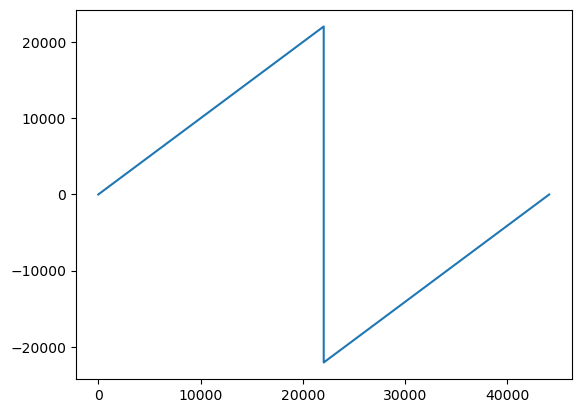

In [17]:
plt.plot(frequencies)

C:\Users\lmr20\miniconda3\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\lmr20\miniconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


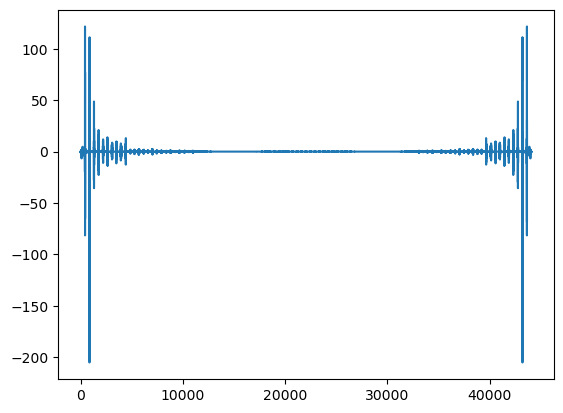

In [18]:
plt.plot(fft_data)

In [33]:
print('identified peaks are', frequencies[peak_indices])
find_peaks(frequencies)

identified peaks are [  441.   878.  1319. -1319.  -878.  -441.]


(array([22049]), {})

AttributeError: module 'numpy' has no attribute 'j'

In [41]:
np.abs(1+1j)

np.float64(1.4142135623730951)

In [42]:
np.sqrt(2)

np.float64(1.4142135623730951)

np.complex128(1j)

In [1]:
print('testing 123')

testing 123
